In [69]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
def getFruits(fruits, data_type, print_n = False, k_fold = False):
  # data_type is Training or Test
  # print_n is to print the number of images in each catergory
  images = []
  labels = []
  val = ['Training', 'Test']
  if not k_fold:
    path = "/content/fruits-360_dataset/fruits-360/" + data_type + "/"
    for i, f in enumerate(fruits):
      p = path + f
      j = 0
      for image_path in glob.glob(os.path.join(p, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image,(100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(i)
        j +=1
      if(print_n):
        print("There are ", j, " ",data_type, " images of ", f )
    images = np.array(images)
    labels = np.array(labels)
    return images, labels
  else:
    for v in val:
      path = "/content/fruits-360_dataset/fruits-360/" + v + "/"
      for i, f in enumerate(fruits):
        p = path + f 
        j = 0
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
          image = cv2.imread(image_path, cv2.IMREAD_COLOR)
          image = cv2.resize(image, (100,100))
          image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
          images.append(image)
          labels.append(i)
          j+=1
    images = np.array(images)
    labels = np.array(labels)
    return images, labels
def getAllFruits():
  fruits = []
  for fruit_path in glob.glob():
    fruit = fruit_path.split("/")[-1]
    fruits.append(fruit)
  return fruits
    
      

In [ ]:
# I will classify three fruits
fruits = ['Pineapple', 'Cocos', 'Orange']
# Get images and labels
X_t, y_train = getFruits(fruits, 'Training', print_n = True, k_fold= False)
X_test, y_test = getFruits(fruits, 'Test', print_n = True, k_fold= False)
# Get data for k-fold
X, y = getFruits(fruits,'', print_n=True, k_fold= True)
# Scale Data Image
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

There are  490   Training  images of  Pineapple
There are  490   Training  images of  Cocos
There are  479   Training  images of  Orange
There are  166   Test  images of  Pineapple
There are  166   Test  images of  Cocos
There are  160   Test  images of  Orange


In [ ]:
X_train.shape

(1459, 30000)

In [ ]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1        

Cocos


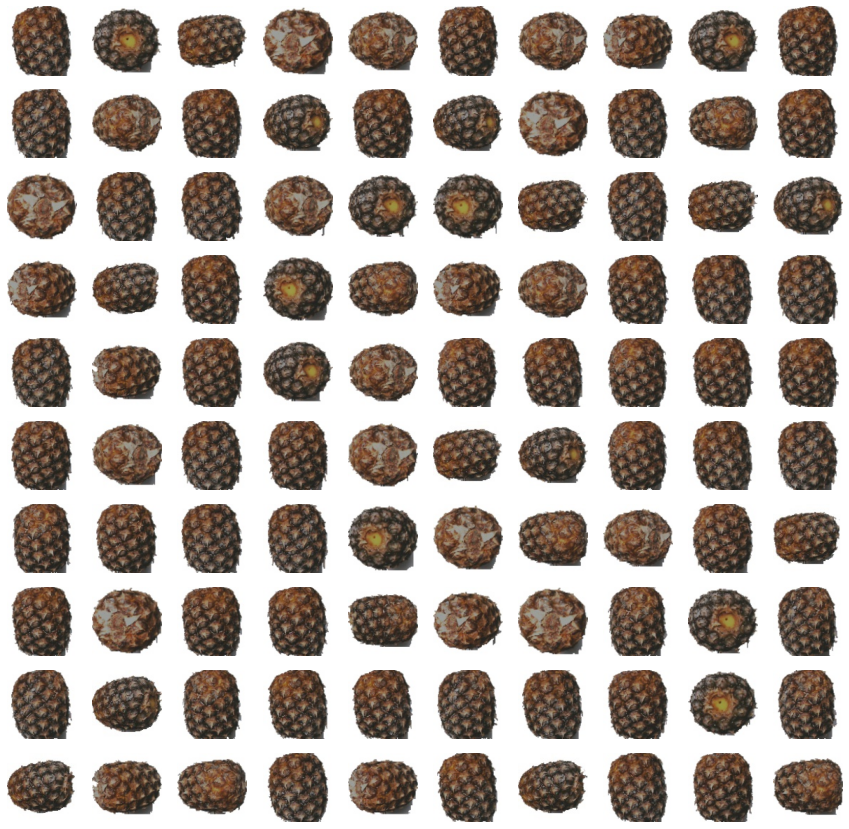

In [ ]:
print(fruits[y_train[491]])
plot_image_grid(X_t[0:100], 10, 10)
plt.savefig("Pineapple.png")

In [ ]:
print(fruits[y_train[491]])
plot_image_grid(X_t[1300:1400], 10, 10)
plt.savefig(".png")

Cocos


In [ ]:
!unzip /content/sample_data/fruits.zip

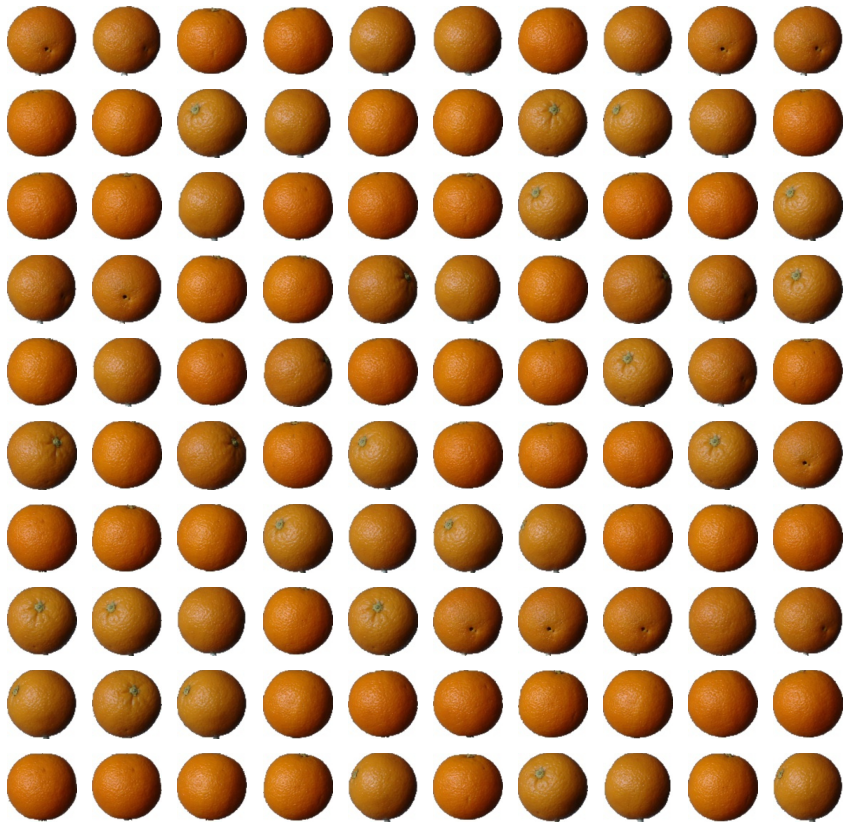

In [76]:
plot_image_grid(X_t[1300:1400], 10, 10)
plt.savefig("Orange1.png")

In [83]:
def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0 
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruits[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruits[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

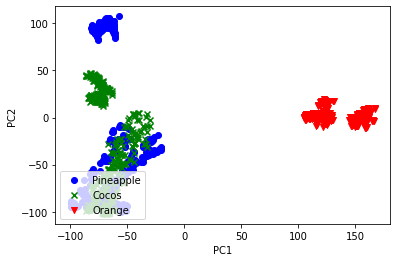

In [84]:
pca = PCA(n_components=3)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)
plt.savefig("data2D.png")

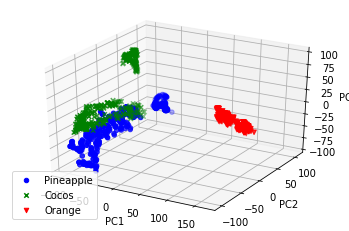

In [85]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)
plt.savefig("data3D.png")

In [ ]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

Accuracy with Decision Tree: 94.11%


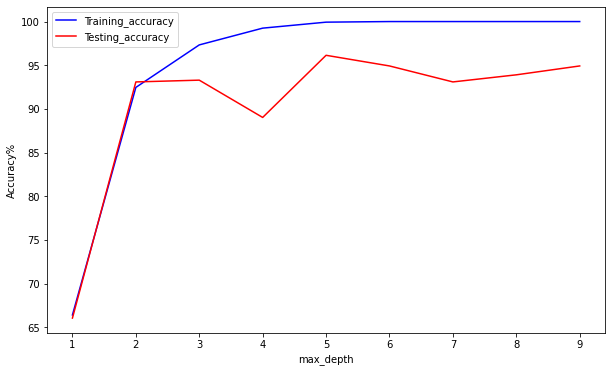

In [86]:
# CHANGING MAX_DEPTH
score_train=[]
score_test=[]

for i in range(1,10):
    dtree_md = DecisionTreeClassifier(max_depth=i)
    dtree_md.fit(X_train,y_train)
    
    score_train.append(dtree_md.score(X_train,y_train)*100)
    score_test.append(dtree_md.score(X_test,y_test)*100)
    
score_train_array=np.asarray(score_train)
score_test_array=np.asarray(score_test)
plt.figure(figsize=(10,6))
plt.plot(range(1,10),score_train_array,color='blue', label="Training_accuracy")
plt.plot(range(1,10),score_test_array,color='red',label="Testing_accuracy")

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy%')
plt.savefig("TrainTest.png")

In [ ]:
matrix = confusion_matrix(y_pred, y_test)

[[141  25   0]
 [  4 162   0]
 [  0   0 160]]


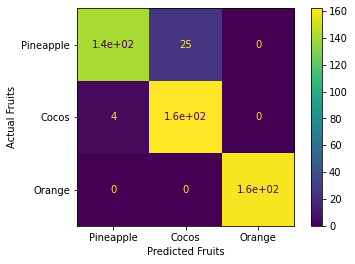

In [88]:
cm = confusion_matrix(y_test, y_pred)
## Print the Confusion Matrix.
print(cm)
cmd_obj = metrics.ConfusionMatrixDisplay(cm, display_labels=fruits)
cmd_obj.plot()
cmd_obj.ax_.set(
                xlabel='Predicted Fruits', 
                ylabel='Actual Fruits')
plt.savefig("confusionmatrix.png")